<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/Week14_Customers_KMeans%26HAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
x = data.iloc[:,[3,4]].values #returns an array of values.
#x

In [ ]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         CustomerID   Genre  <...>n\n[200 rows x 5 columns]
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
seaborn    module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
x          ndarray      200x2: 400 elems, type `int64`, 3200 bytes


In [ ]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

269981.28
181363.59595959593
106348.37306211122
73679.78903948836
44448.4554479337
37233.814510710006
30259.65720728547
25011.839349156588
21850.165282585636
19672.072849014323


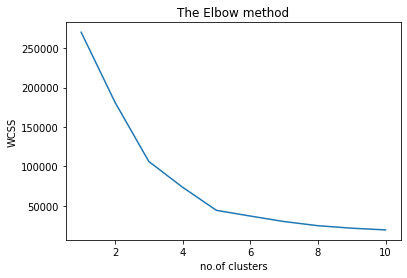

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show() 

So, the optimal no.of clusters is 5.

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = kmeans.fit_predict(x)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

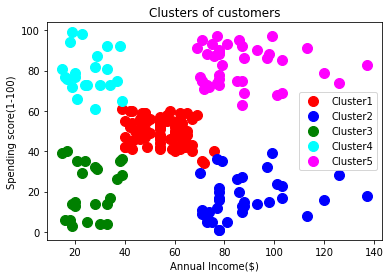

In [ ]:
plt.scatter(x[y==0, 0], x[y==0, 1], s=100, c='red', label='Cluster1')
plt.scatter(x[y==1, 0], x[y==1, 1], s=100, c='blue', label='Cluster2')
plt.scatter(x[y==2, 0], x[y==2, 1], s=100, c='green', label='Cluster3')
plt.scatter(x[y==3, 0], x[y==3, 1], s=100, c='cyan', label='Cluster4')
plt.scatter(x[y==4, 0], x[y==4, 1], s=100, c='magenta', label='Cluster5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income($)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

# Agglomerative Hierarchical Clustering.

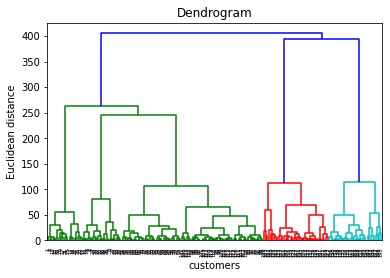

In [ ]:
# using dendrogram to find the optimal no.of clusters.

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

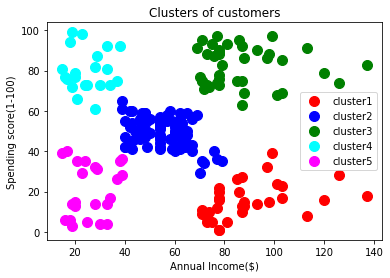

In [ ]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='red', label='cluster1')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='blue', label='cluster2')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='green', label='cluster3')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='cyan', label='cluster4')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='magenta', label='cluster5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income($)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()